In [1]:
!pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.4 MB/s eta 0:00:00


In [11]:
# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [9]:
num_locations = 20  # Number of locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # central depot location as a fixed point
num_vehicles = 3  # Number of vehicles that are available to visit the locations

In [3]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

In [10]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations) # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

In [12]:
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [13]:
toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection


In [14]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [15]:
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

gen	nevals	avg    	min    
0  	300   	510.093	3.38549
1  	213   	489.202	1.12995
2  	243   	484.511	1.57601
3  	232   	480.104	3.14843
4  	233   	472.134	2.98295
5  	218   	468.702	4.99437
6  	213   	459.955	7.08151
7  	233   	455.55 	4.75651
8  	219   	450.156	3.78571
9  	209   	447.867	3.78571
10 	224   	444.811	4.90499
11 	230   	450.366	3.30117
12 	230   	447.142	3.30117
13 	217   	443.734	0.662725
14 	231   	439.138	3.44278 
15 	250   	428.586	2.38486 
16 	238   	425.033	5.25226 
17 	236   	414.803	1.63749 
18 	225   	397.554	4.97611 
19 	225   	374.897	4.0526  
20 	209   	357.542	1.20234 
21 	232   	347.368	1.20234 
22 	237   	336.128	4.39182 
23 	217   	329.752	3.66535 
24 	227   	321.095	2.75422 
25 	246   	314.35 	3.65041 
26 	233   	302.219	3.65041 
27 	219   	300.049	3.02742 
28 	229   	291.801	2.70904 
29 	223   	291.72 	9.22827 
30 	238   	289.859	11.9113 
31 	225   	285.071	4.65949 
32 	221   	284.191	5.03689 
33 	243   	276.091	6.42637 
34 	232   	274.308	6.65002 
35 	24

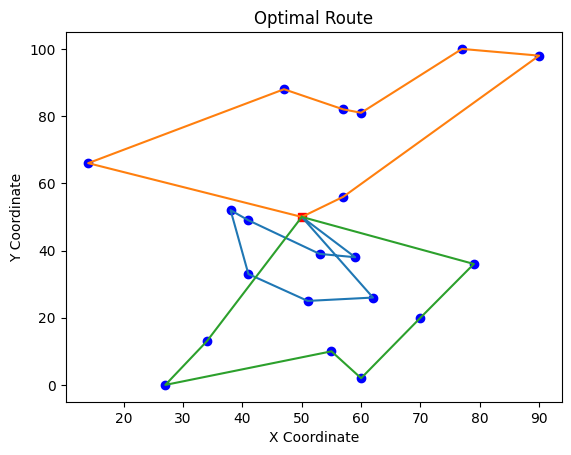

In [16]:
if __name__ == "__main__":
    main()